In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
from sklearn import datasets
import pandas as pd
style.use('fivethirtyeight')

In [88]:
dataset = {'b':[[1,2],[2,3],[3,1]], 'r':[[6,7],[7,8],[8,6]]}
test_feature = [4,5]

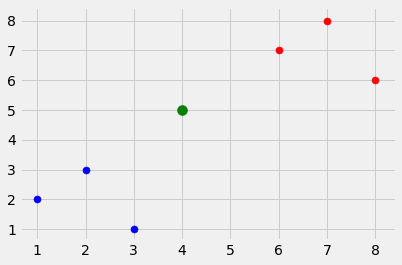

In [89]:
[[plt.scatter(ii[0],ii[1], s=50, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(test_feature[0],test_feature[1],s=100,color='g')
plt.show()

In [90]:
def KNN(data, predict, k=3):
    if len(data)>=k:
        print('Please give correct value of k')
    distances = []
    for group in data:
        for features in data[group]:
            # euclidean_distance = sqrt((features[0]-predict[0])**2 + (features[1]-predict[1])**2)
            # euclidean_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = (Counter(votes).most_common(1)[0][1]/k)*100
    return vote_result, confidence

In [91]:
result, confidence = KNN(dataset, test_feature)
print(result, confidence)

b 66.66666666666666


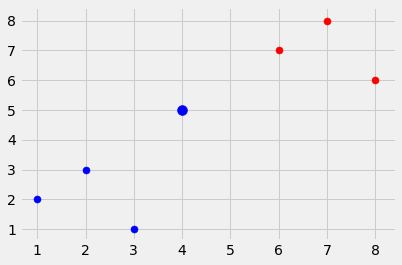

In [92]:
[[plt.scatter(ii[0],ii[1], s=50, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(test_feature[0],test_feature[1],s=100,color=result)
plt.show()

# Applying on Breast Cancer dataset

In [101]:
import random
data = datasets.load_breast_cancer()
x = data.data
y = data.target
features = data.feature_names
df = pd.DataFrame(data = x, columns=features)
df['label'] = y
full_data = df.values.tolist()
random.shuffle(full_data)

In [102]:
test_size = 0.2
train_set = {0:[], 1:[]}
test_set = {0:[], 1:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [103]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [104]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        result, confidence = KNN(train_set, data, k=5)
        if result == group:
            correct+=1
        else:
            print(confidence)
        total+=1
accuracy = correct/total
print(accuracy)

100.0
80.0
60.0
100.0
60.0
80.0
80.0
0.9380530973451328
